In [11]:
# -*- coding: utf-8 -*-
"""

@author: profa
"""

#######################################################
##
##
##  Sentiment Analysis with NN/TF/Keras/Embedding
##
##  Gates
##
###########################################################

## Directions:
## 
## Install keras
## 1) Open a new command (or terminal) window. In Windows, this is 
##    called an Anaconda Prompt and you can access it my typing cmd 
##    into the windowns search area.
## 2) Then, into the Anaconda prompt type
##    conda install -c conda-forge keras
## 

## RUN all of the following imports to assure that you have all
## the libraries/packages that you need. 

################################################################


import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding
import os
import matplotlib.pyplot as plt
import re
import shutil
import string
from tensorflow.keras import losses
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


print(tf.__version__)


2.12.0


In [46]:
filename="data/new_tiktok_google_play_reviews.csv"

df=pd.read_csv(filename)
df = df[df['new_content'].notnull()]

new_df = df[df['new_content'].apply(lambda x: len(x) > 3) & df['new_content'].apply(lambda x: len(x) < 50)]
HeadlineLIST= new_df['new_content']
LabelLIST=new_df['score']
### Vectorize
MyCountV=CountVectorizer(
    input="content",
    lowercase=True,
    stop_words = "english",
    max_features=50
)

MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
ColumnNames=MyCountV.get_feature_names()
DF_Count=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)
new_df = new_df.reset_index()
DF_Count=DF_Count.rename(new_df['score'], axis="index")
DF_Count = DF_Count.reset_index()
# df_downsampled = DF_Count.groupby('index').apply(lambda x: x.sample(n=5000))
# df_downsampled.to_csv('df_nn.csv')
DF_Count.to_csv('df_nn.csv')




In [47]:
filename="df_nn.csv"

df=pd.read_csv(filename)
df = df.rename(columns={ df.columns[0]: "Label" })
df_tem = df
# df_tem = df_tem.drop(['LABEL'], axis = 1)
df_tem.drop([col for col, val in df_tem.sum().iteritems() if val < 100], axis=1, inplace=True)
df_tem

/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_63460/3481989589.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  df_tem.drop([col for col, val in df_tem.sum().iteritems() if val < 100], axis=1, inplace=True)


,Label,account,amazing,app,application,awesome,bad,ban,cool,download,...,time,tok,update,use,video,view,viral,watch,wonderful,work
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354154,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354155,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354156,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354157,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.model_selection import train_test_split
import random as rd
TrainDF1, TestDF1 = train_test_split(df_tem, test_size=0.2)

In [49]:
test_labels=TestDF1["Label"]
## remove labels
test_data = TestDF1.drop(["Label"], axis=1)
## TRAIN ----------------------------
train_labels=TrainDF1["Label"]
## remove labels
training_data = TrainDF1.drop(["Label"], axis=1)

In [50]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Epoch 1/10
8854/8854 [==============================] - 11s 1ms/step - loss: -89.5682 - accuracy: 0.1089 - val_loss: -210.9963 - val_accuracy: 0.1084
Epoch 2/10
8854/8854 [==============================] - 10s 1ms/step - loss: -344.0174 - accuracy: 0.1091 - val_loss: -477.0983 - val_accuracy: 0.1084
Epoch 3/10
8854/8854 [==============================] - 11s 1ms/step - loss: -608.9328 - accuracy: 0.1091 - val_loss: -741.9171 - val_accuracy: 0.1084
Epoch 4/10
8854/8854 [==============================] - 11s 1ms/step - loss: -874.1245 - accuracy: 0.1091 - val_loss: -1006.7803 - val_accuracy: 0.1084
Epoch 5/10
8854/8854 [==============================] - 10s 1ms/step - loss: -1139.1293 - accuracy: 0.1091 - val_loss: -1271.5300 - val_accuracy: 0.1084
Epoch 6/10
8854/8854 [==============================] - 11s 1ms/step - loss: -1402.5612 - accuracy: 0.1091 - val_loss: -1536.2609 - val_accuracy: 0.1084
Epoch 7/10
8854/8854 [==============================] - 11s 1ms/step - loss: -1667.6168 - 

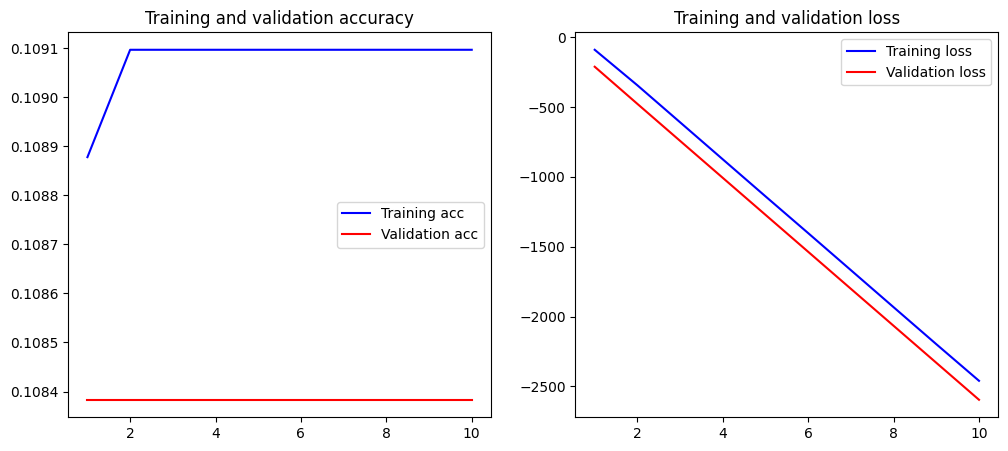

In [52]:
# ANN   
input_data = tensorflow.keras.layers.Input(shape=(50))
data = tensorflow.keras.layers.Embedding(input_dim=50, output_dim=18, input_length=50)(input_data)
data = tensorflow.keras.layers.Flatten()(data)
data = tensorflow.keras.layers.Dense(16)(data)
data = tensorflow.keras.layers.Activation('relu')(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
data = tensorflow.keras.layers.Dense(8)(data)
data = tensorflow.keras.layers.Activation('sigmoid')(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(training_data, train_labels, validation_data=(test_data, test_labels), epochs=10)
plot_history(history)

In [53]:
# RNN
input_data = tensorflow.keras.layers.Input(shape=(50))
data = tensorflow.keras.layers.Embedding(input_dim=50, output_dim=32, input_length=50)(input_data)
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.SimpleRNN(50))(data)
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)

model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(training_data, train_labels, validation_data=(test_data, test_labels),epochs=10)
plot_history(history)

Epoch 1/10
5308/8854 [================>.............] - ETA: 37s - loss: -946.5080 - accuracy: 0.1086

KeyboardInterrupt: 

In [54]:
# LSTM
input_data = tensorflow.keras.layers.Input(shape=(50))
data = tensorflow.keras.layers.Embedding(input_dim=50, output_dim=32, input_length=50)(input_data)
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(50))(data)
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

history = model.fit(training_data, train_labels, validation_data=(test_data, test_labels), epochs=10)

plot_history(history)

Epoch 1/10
 630/8854 [=>............................] - ETA: 1:42 - loss: -154.4873 - accuracy: 0.1093

KeyboardInterrupt: 

In [55]:
# CNN
input_data = tensorflow.keras.layers.Input(shape=(50))
data = tensorflow.keras.layers.Embedding(input_dim=50, output_dim=32, input_length=50)(input_data)
data = tensorflow.keras.layers.Conv1D(50, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
data = tensorflow.keras.layers.Conv1D(40, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
data = tensorflow.keras.layers.Conv1D(30, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data) 
data = tensorflow.keras.layers.Conv1D(30, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
data = tensorflow.keras.layers.Flatten()(data)
data = tensorflow.keras.layers.Dense(20)(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)

model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(training_data, train_labels, validation_data=(test_data, test_labels), epochs=10)


plot_history(history)

Epoch 1/10
1154/8854 [==>...........................] - ETA: 40s - loss: -15086058995712.0000 - accuracy: 0.1089

KeyboardInterrupt: 